/opt/anaconda3/envs/tora/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,306 (466.04 KB)

 Trainable params: 118,794 (464.04 KB)

 Non-trainable params: 512 (2.00 KB)

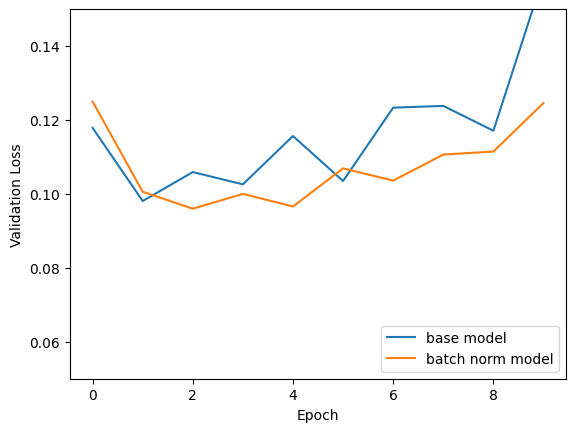

In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt

import logging
import os

logging.disable(logging.WARNING)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

np.random.seed(42)
tf.random.set_seed(42)


# 배치 정규화를 적용하기 전 모델입니다.

def generate_basic_model():
    basic_model = tf.keras.Sequential([
                  tf.keras.layers.Flatten(input_shape=(28, 28)),
                  tf.keras.layers.Dense(128),
                  tf.keras.layers.Activation('relu'),
                  tf.keras.layers.Dense(128),
                  tf.keras.layers.Dense(10, activation='softmax')])
    return basic_model


def generate_batch_norm_model():
    '''
    1. 기본 모델 (base_model) 의 각 Dense Layer 사이에 배치 정규화 레이어를 적용한
    모델을 정의합니다. 입력층과 출력층은 그대로 사용합니다.
    '''
    bn_model = tf.keras.Sequential([
                tf.keras.layers.Flatten(input_shape=(28, 28)),
                tf.keras.layers.Dense(128),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Activation('relu'),
                tf.keras.layers.Dense(128),
                tf.keras.layers.BatchNormalization(),
                tf.keras.layers.Dense(10, activation='softmax')])
    return bn_model


def main():
    '''
    2. 두 개의 모델을 불러온 후, 각 레이어 별 출력값을 비교합니다.

    Step01. generate_basic_model, generate_batch_norm_model 함수를 이용해 두 모델을 불러옵니다.

    Step02. 두 모델의 손실 함수, 최적화 알고리즘,
            평가 방법을 설정합니다.

    Step03. 두 모델의 구조를 확인하는 코드를 작성합니다.

    Step04. 두 모델을 학습시킵니다.

    Step05. 두 모델의 Validation Loss를 시각화하여 비교합니다.
    '''

    # MNIST 데이터를 불러오고 전처리합니다.
    mnist = tf.keras.datasets.mnist
    (train_data, train_labels), (test_data, test_labels) = mnist.load_data()
    train_data, test_data = train_data / 255.0, test_data / 255.0

    # 기본 모델과 배치 정규화를 적용한 모델을 불러옵니다.
    base_model = generate_basic_model()
    bn_model = generate_batch_norm_model()

    # 두 모델의 구조를 확인하는 코드를 작성합니다.
    base_model.summary()
    bn_model.summary()

    # 두 모델의 손실 함수, 최적화 알고리즘, 평가 방법을 설정합니다.
    base_model.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])
    bn_model.compile(optimizer='adam',
                     loss='sparse_categorical_crossentropy',
                     metrics=['accuracy'])
    
    # 두 모델을 학습시킵니다.
    base_history = base_model.fit(train_data, train_labels, epochs=10,
                                  validation_data=(test_data, test_labels) , verbose = 0)
    bn_history = bn_model.fit(train_data, train_labels, epochs=10, 
                              validation_data=(test_data, test_labels) , verbose = 0)
    
    # 두 모델의 Validation Loss를 시각화 하여 비교하는 코드입니다.
    plt.plot(base_history.history['val_loss'], label='base model')
    plt.plot(bn_history.history['val_loss'], label='batch norm model')
    plt.xlabel('Epoch')
    plt.ylabel('Validation Loss')
    plt.ylim([0.05, 0.15])
    plt.legend(loc='lower right')


    return base_model, bn_model


if __name__ == "__main__":
    main()